<a href="https://colab.research.google.com/github/ezio341/PCVK_Genap_20-21/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [24]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

**Histogram Kemunculan Warna**

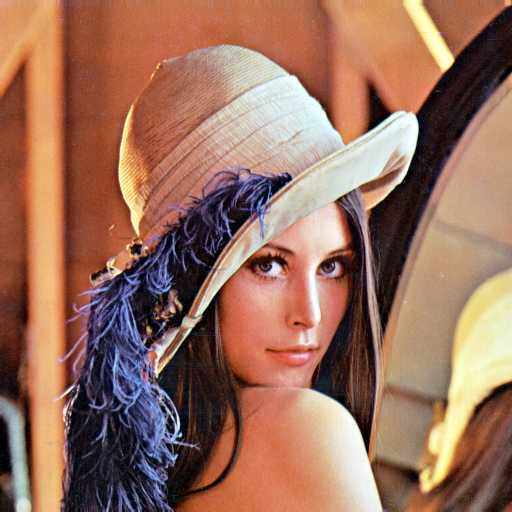

<BarContainer object of 256 artists>

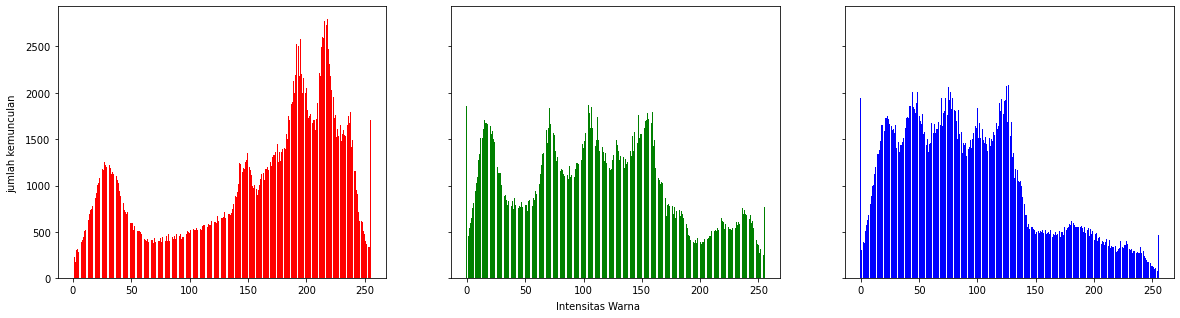

In [33]:
img = cv.imread('/content/drive/MyDrive/Assets/lena.jpg')
cv2_imshow(img)

chb, chg, chr = cv.split(img) # split the image into 3 color channels

# make a new cumulative array from a single color channel
def hist(channel):
  cl = np.zeros(np.arange(256).shape)
  for h in channel:
    for color in h:
      cl[color] +=1
  return cl

names = np.arange(256) # used to x label
fig, axs = plt.subplots(1, 3, figsize = [20,5], sharex=True, sharey=True)
fig.text(0.09, 0.5, 'jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
# display bar chart
axs[0].bar(names, hist(chr), color='red')
axs[1].bar(names, hist(chg), color='green')
axs[2].bar(names, hist(chb), color='blue')

**Histogram using np.histogram**

<BarContainer object of 256 artists>

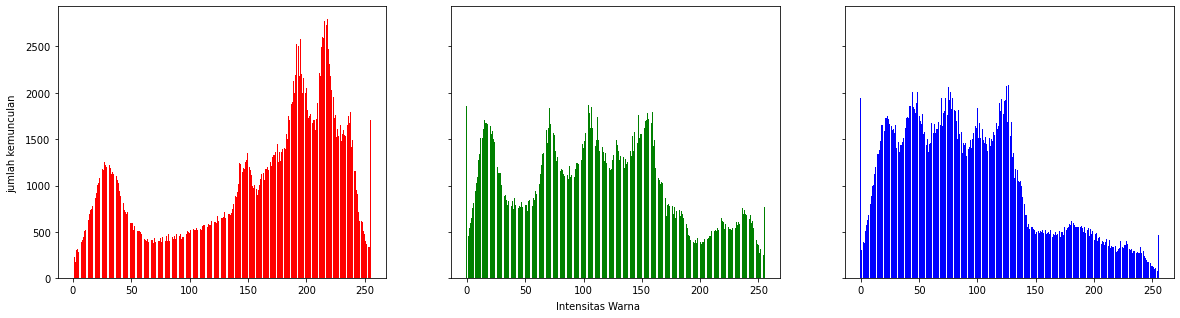

In [ ]:
channels = cv.split(img) # split into RGB color channels
names = np.arange(256) # used to x label
fig, axs = plt.subplots(1, 3, figsize = [20,5], sharex=True, sharey=True)
fig.text(0.09, 0.5, 'jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
# display bar chart of each channel from np.histogram conversion
axs[0].bar(names, np.histogram(channels[2], 256, [0,256])[0], color='red')
axs[1].bar(names, np.histogram(channels[1], 256, [0,256])[0], color='green')
axs[2].bar(names, np.histogram(channels[0], 256, [0,256])[0], color='blue')

**Equalization Manual**

In [34]:
def histogram_equalization(img_in):
# segregate color streams
    b,g,r = cv.split(img_in)
    h_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    h_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    h_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
# calculate cdf    
    cdf_b = np.cumsum(h_b)  
    cdf_g = np.cumsum(h_g)
    cdf_r = np.cumsum(h_r)
    
# mask all pixels with value=0 and replace it with mean of the pixel values 
    cdf_m_b = np.ma.masked_equal(cdf_b,0)
    cdf_m_b = (cdf_m_b - cdf_m_b.min())*255/(cdf_m_b.max()-cdf_m_b.min())
    cdf_final_b = np.ma.filled(cdf_m_b,0).astype('uint8')
  
    cdf_m_g = np.ma.masked_equal(cdf_g,0)
    cdf_m_g = (cdf_m_g - cdf_m_g.min())*255/(cdf_m_g.max()-cdf_m_g.min())
    cdf_final_g = np.ma.filled(cdf_m_g,0).astype('uint8')
    cdf_m_r = np.ma.masked_equal(cdf_r,0)
    cdf_m_r = (cdf_m_r - cdf_m_r.min())*255/(cdf_m_r.max()-cdf_m_r.min())
    cdf_final_r = np.ma.filled(cdf_m_r,0).astype('uint8')
# merge the images in the three channels
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
  
    img_out = cv.merge((img_b, img_g, img_r))

    return img_out

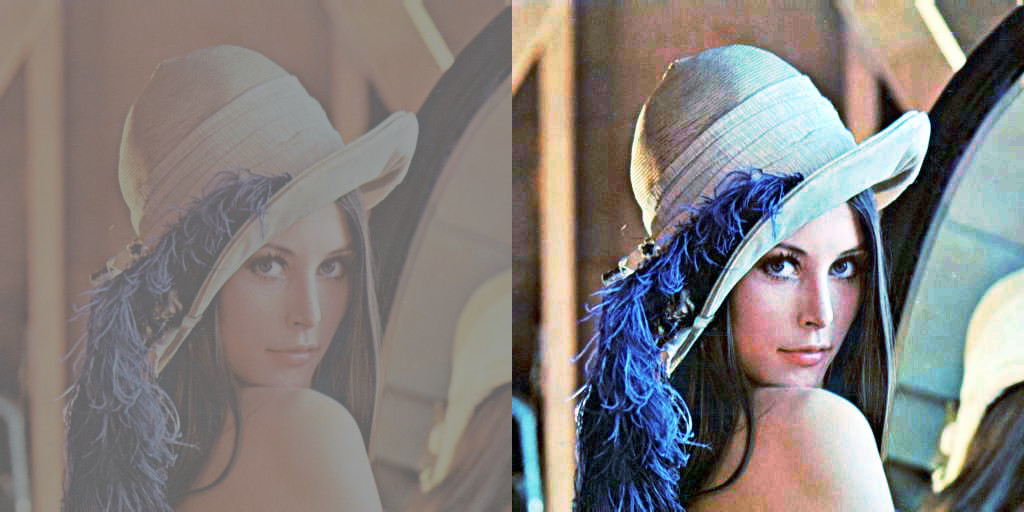

<BarContainer object of 256 artists>

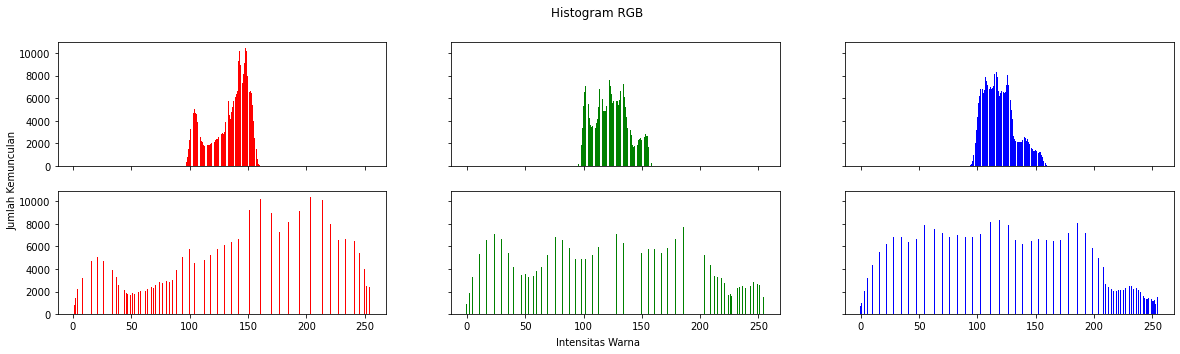

In [35]:
img = cv.imread('/content/drive/MyDrive/Assets/lena_lc.jpg')
channels = cv.split(img)
equalize_img = histogram_equalization(img)
b,g,r = cv.split(equalize_img)

frame = cv.hconcat((img, histogram_equalization(img)))
cv2_imshow(frame)

names = np.arange(256)
fig, axs = plt.subplots(2, 3, True, True, figsize = [20,5])
fig.suptitle('Histogram RGB')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0,0].bar(names, hist(channels[2]), color='red')
axs[0,1].bar(names, hist(channels[1]), color='green')
axs[0,2].bar(names, hist(channels[0]), color='blue')
axs[1,0].bar(names, np.histogram(r, 256, [0,256])[0], color='red')
axs[1,1].bar(names, np.histogram(g, 256, [0,256])[0], color='green')
axs[1,2].bar(names, np.histogram(b, 256, [0,256])[0], color='blue')


**Equalize Image using equalizeHist**

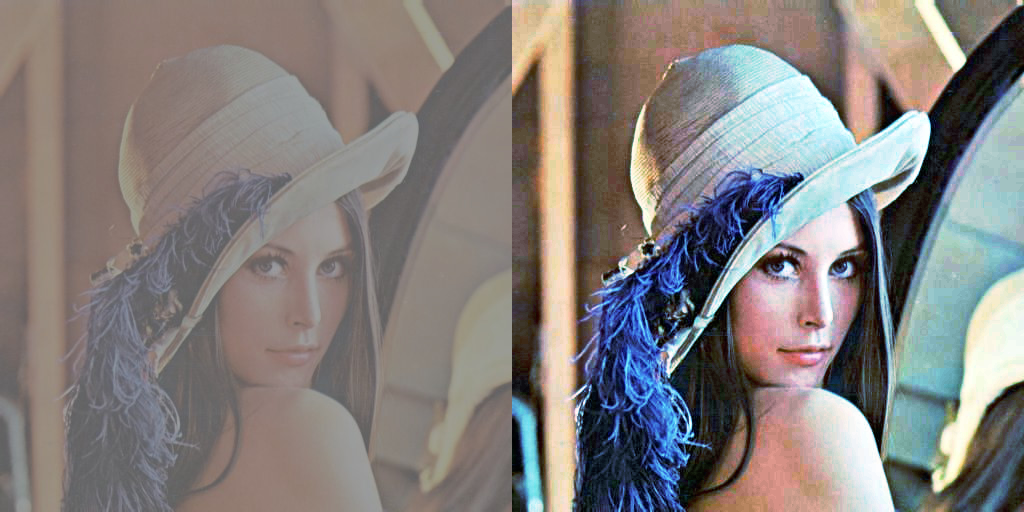

<BarContainer object of 256 artists>

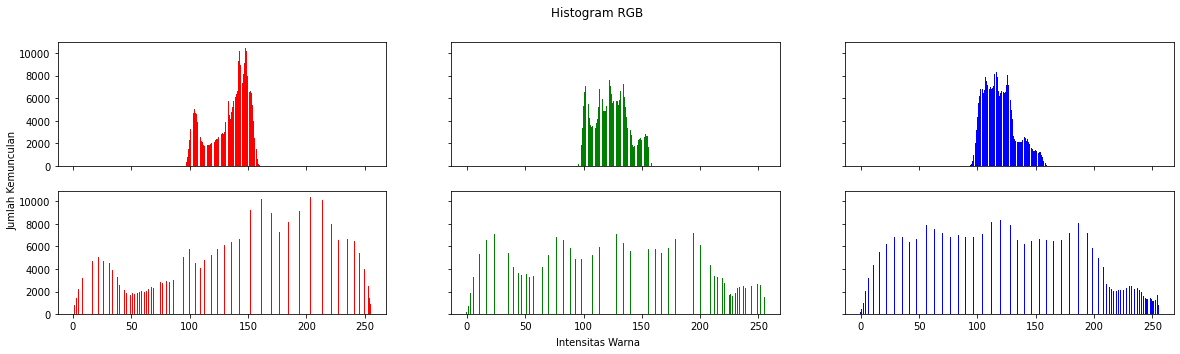

In [ ]:
img = cv.imread('/content/drive/MyDrive/Assets/lena_lc.jpg')
channels = cv.split(img) # split RGB channels
eq_channel = [] # equalize channel container

for ch in channels:
  eq_channel.append(cv.equalizeHist(ch)) # append equalizeHist to container
eq_img = cv.merge(eq_channel) # merge the RGB splitted channels

frame = cv.hconcat((img, eq_img))
cv2_imshow(frame)

names = np.arange(256)
fig, axs = plt.subplots(2, 3, True, True, figsize = [20,5])
fig.suptitle('Histogram RGB')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
# Display bar chart. reuse the hist function from Histogram Kemunculan Warna 
axs[0,0].bar(names, hist(channels[2]), color='red')
axs[0,1].bar(names, hist(channels[1]), color='green')
axs[0,2].bar(names, hist(channels[0]), color='blue')
axs[1,0].bar(names, hist(eq_channel[2]), color='red')
axs[1,1].bar(names, hist(eq_channel[1]), color='green')
axs[1,2].bar(names, hist(eq_channel[0]), color='blue')

**Dithering Image**

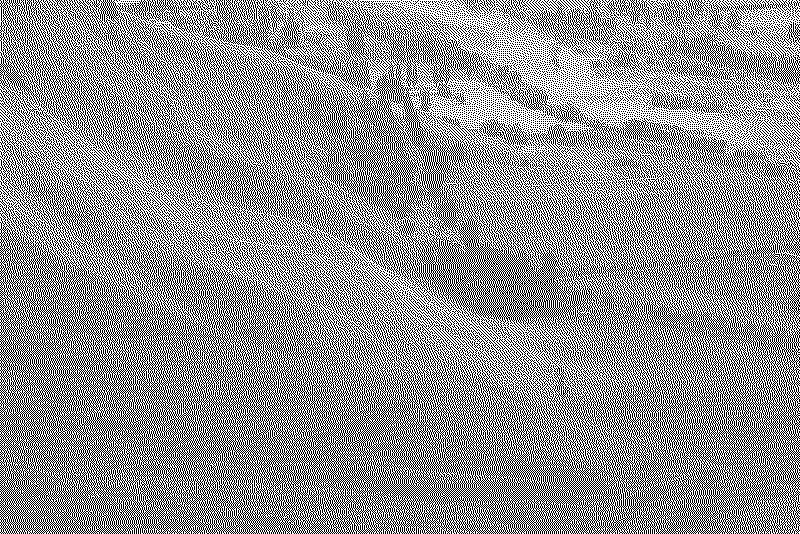

In [32]:
Image = cv.imread('/content/drive/MyDrive/Assets/wiki.jpg')

GrayImage = cv.cvtColor(Image, cv.COLOR_BGR2GRAY)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
  for x in range(0, Width):

    old_value = GrayImage[y, x]
    new_value = 0
    if (old_value > 128) :
        new_value = 255

    GrayImage[y, x] = new_value

    Error = old_value - new_value

    if (x<Width-1):
      NewNumber = GrayImage[y, x+1] + Error * 7 / 16
      if (NewNumber>255) : NewNumber=255
      elif (NewNumber<0) : NewNumber=0
      GrayImage[y, x+1] = NewNumber

    if (x>0 and y<Height-1):
      NewNumber = GrayImage[y+1, x-1] + Error * 3 / 16
      if (NewNumber>255) : NewNumber=255
      elif (NewNumber<0) : NewNumber=0
      GrayImage[y+1, x-1] = NewNumber

    if (y<Height-1):
      NewNumber= GrayImage[y+1, x] + Error * 5 / 16
      if (NewNumber>255) : NewNumber=255
      elif (NewNumber<0) : NewNumber=0
      GrayImage[y+1, x] = NewNumber

    if (y<Height-1 and x<Width-1):
      NewNumber = GrayImage[y+1, x+1] + Error * 1 / 16
      if (NewNumber>255) : NewNumber=255
      elif (NewNumber<0) : NewNumber=0
      GrayImage[y+1, x+1] = NewNumber

cv2_imshow(GrayImage)